# Clustering experiment for regularization

In this notebook we will tune parameters of GMN to find out their affect on fitting.

We will use the digits dataset for this experiment
(Num datapoints: `1797`, num features: `64`, num clusters: `10`)

In [230]:
from mixes import GMN, DGMM, GMM, stopping_criterion
from sklearn import preprocessing, datasets, cluster
from sklearn.mixture import GaussianMixture
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
def plot_metrics(evaluator, silhouette=False):
    fig = plt.figure(figsize=[5, 3], dpi=300)
    metrics_df = evaluator.get_dataframe()
    lik_line = plt.plot(metrics_df.index, metrics_df.log_lik, label="log lik", color=COLOR_BLUE)
    twin = plt.gca().twinx()
    plt.sca(twin)
    if silhouette:
        line = plt.plot(metrics_df.index, metrics_df.silhouette,
                        color=COLOR_GREEN, label='silhouette')
    else:
        line = plt.plot(metrics_df.index, metrics_df.ARI,
                        color=COLOR_RED, label="ARI")
    plt.gca().legend(lik_line + line,
                     ['Log lik', 'Silhouette score' if silhouette else 'ARI'])
    return fig

def show_cluster_images(samples, clusters, samples_n=10):
    cluster_u = np.unique(clusters)
    n_clusters = len(cluster_u)

    fig, ax = plt.subplots(n_clusters, samples_n,
                           figsize=(2 * samples_n, 2 * n_clusters))

    for i in range(n_clusters):
        cluster_samples = samples[clusters == cluster_u[i]]
        for j in range(samples_n):
            if len(cluster_samples) < j:
                break
            plt.sca(ax[i][j])
            plt.imshow(cluster_samples[j].reshape([8, 8]), cmap='gray')
            plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

    return fig

# Load the data
data, labels = datasets.load_digits(return_X_y=True)

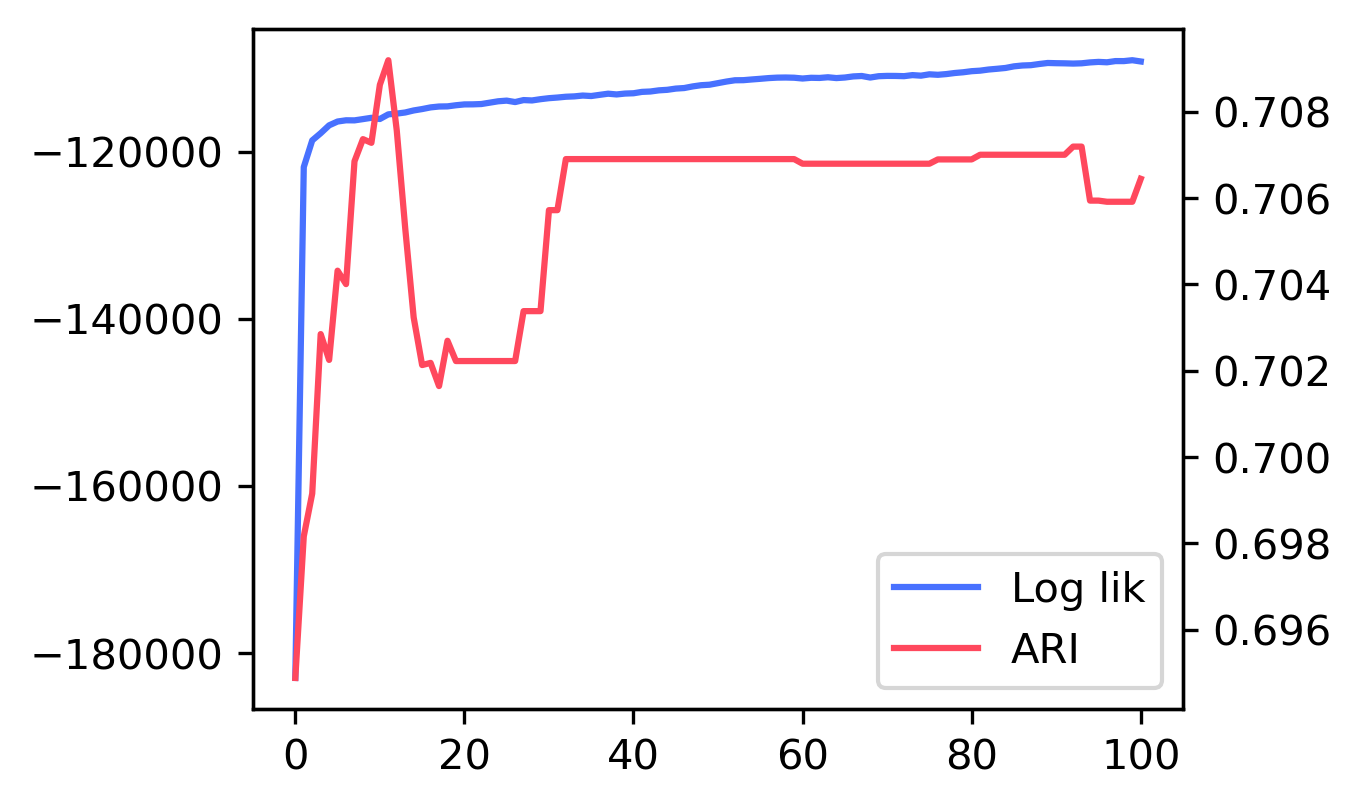

In [141]:
stop_crit = stopping_criterion.create_log_lik_criterion(1e-1)

evaluator_2 = Evaluator(labels, 'silhouette', 'ARI', print_metrics=False)
gmn_2 = GMN([10, 5, 2], [10, 6, 2], init='kmeans',
          update_rate=1, num_iter=100, evaluator=evaluator_2,
          use_annealing=True, annealing_start_v=0.2,
          var_regularization=1e-3,
          stopping_criterion=stop_crit)
gmn_2.fit(data)

fig_2 = plot_metrics(evaluator_2)

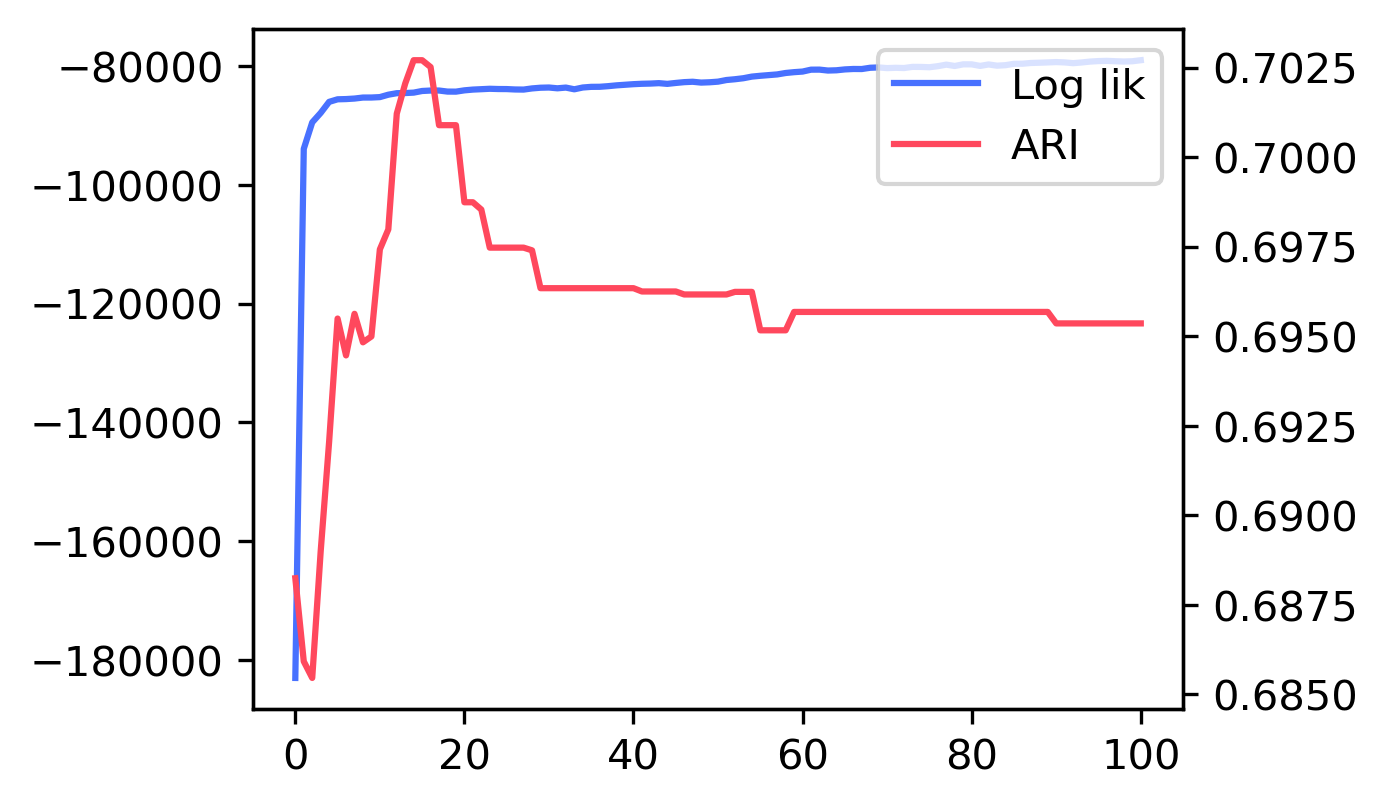

In [193]:
stop_crit = stopping_criterion.create_log_lik_criterion(1e-1)

evaluator_3 = Evaluator(labels, 'silhouette', 'ARI', print_metrics=False)
gmn_3 = GMN([10, 5, 2], [10, 6, 2], init='kmeans',
          update_rate=1, num_iter=100, evaluator=evaluator_3,
          use_annealing=True, annealing_start_v=0.2,
          var_regularization=1e-4,
          stopping_criterion=stop_crit)
gmn_3.fit(data)

fig_3 = plot_metrics(evaluator_3)

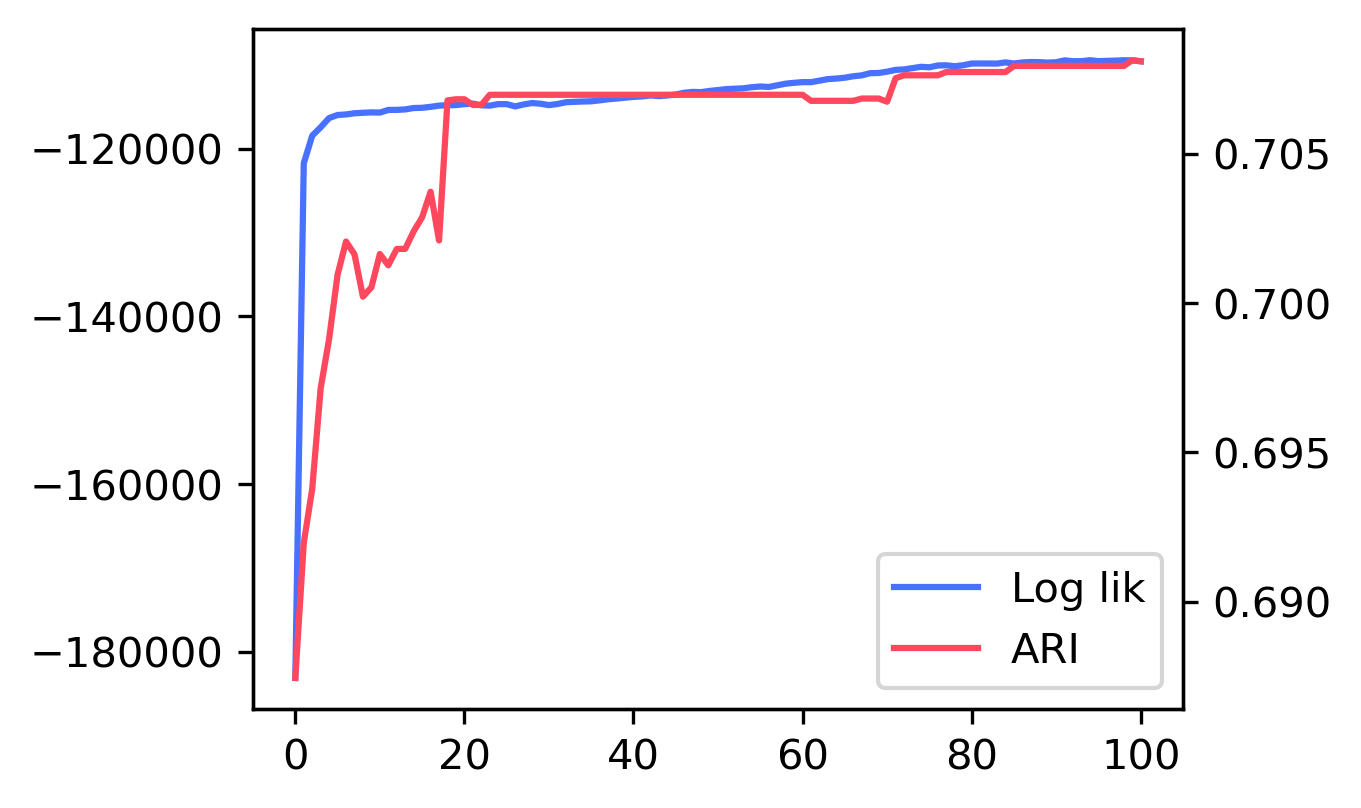

In [194]:
evaluator_4 = Evaluator(labels, 'silhouette', 'ARI', print_metrics=False)
gmn_4 = GMN([10, 3, 2, 2], [10, 6, 4, 2], init='kmeans',
          update_rate=1, num_iter=100, evaluator=evaluator_4,
          use_annealing=True, annealing_start_v=0.2,
          var_regularization=1e-3,
          stopping_criterion=stop_crit)
gmn_4.fit(data)

fig_4 = plot_metrics(evaluator_4)

In [227]:
evaluator_4.get_result()

silhouette         0.170634
ARI                0.708092
log_lik      -109564.327966
Name: 100, dtype: float64

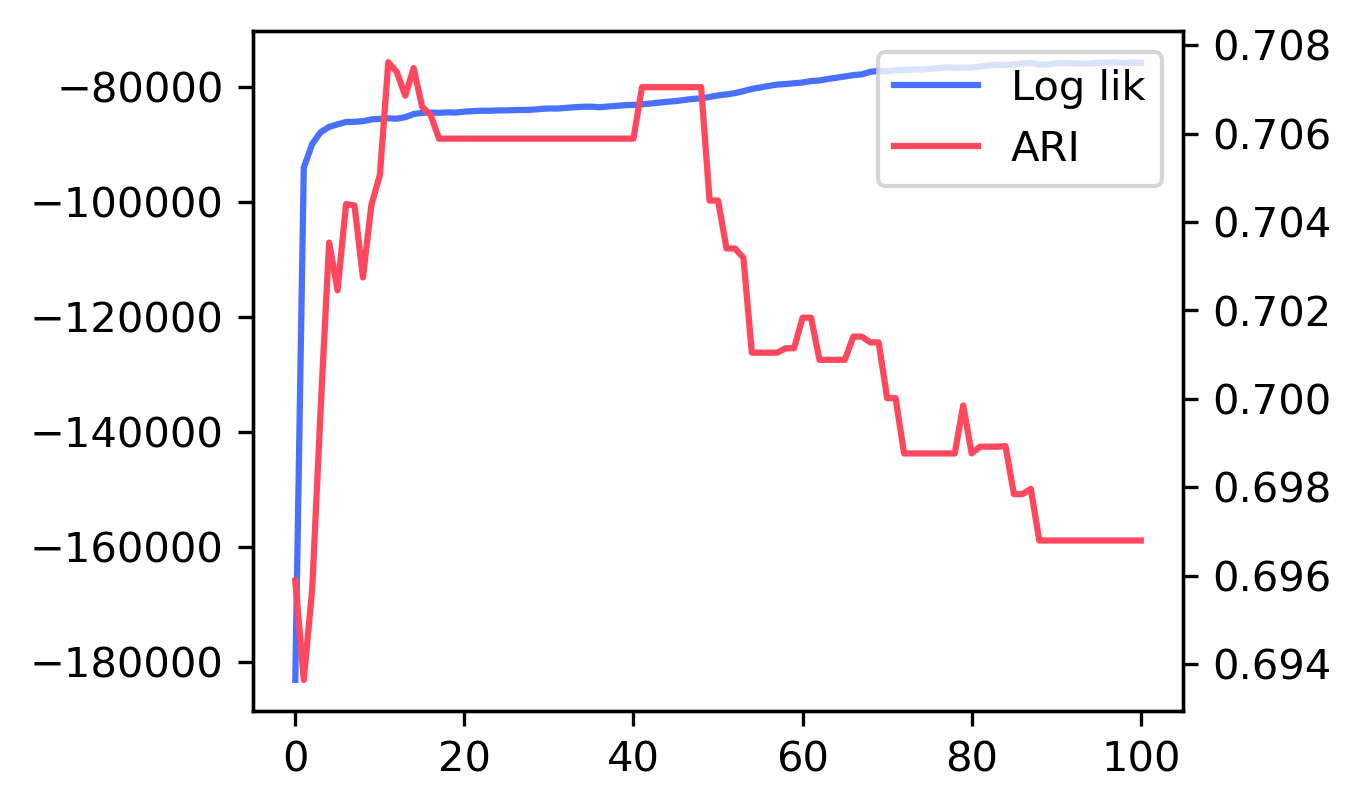

In [209]:
evaluator_8 = Evaluator(labels, 'silhouette', 'ARI', print_metrics=False, calc_frequency=1)
gmn_8 = GMN([10, 3, 2, 2], [10, 6, 4, 2], init='kmeans',
          update_rate=1, num_iter=100, evaluator=evaluator_8,
          use_annealing=True, annealing_start_v=0.2,
          var_regularization=1e-4,
          stopping_criterion=stop_crit)
gmn_8.fit(data)

fig_8 = plot_metrics(evaluator_8)

In [240]:
evaluator_8.get_result()

silhouette        0.168924
ARI               0.696794
log_lik      -75799.417896
Name: 100, dtype: float64

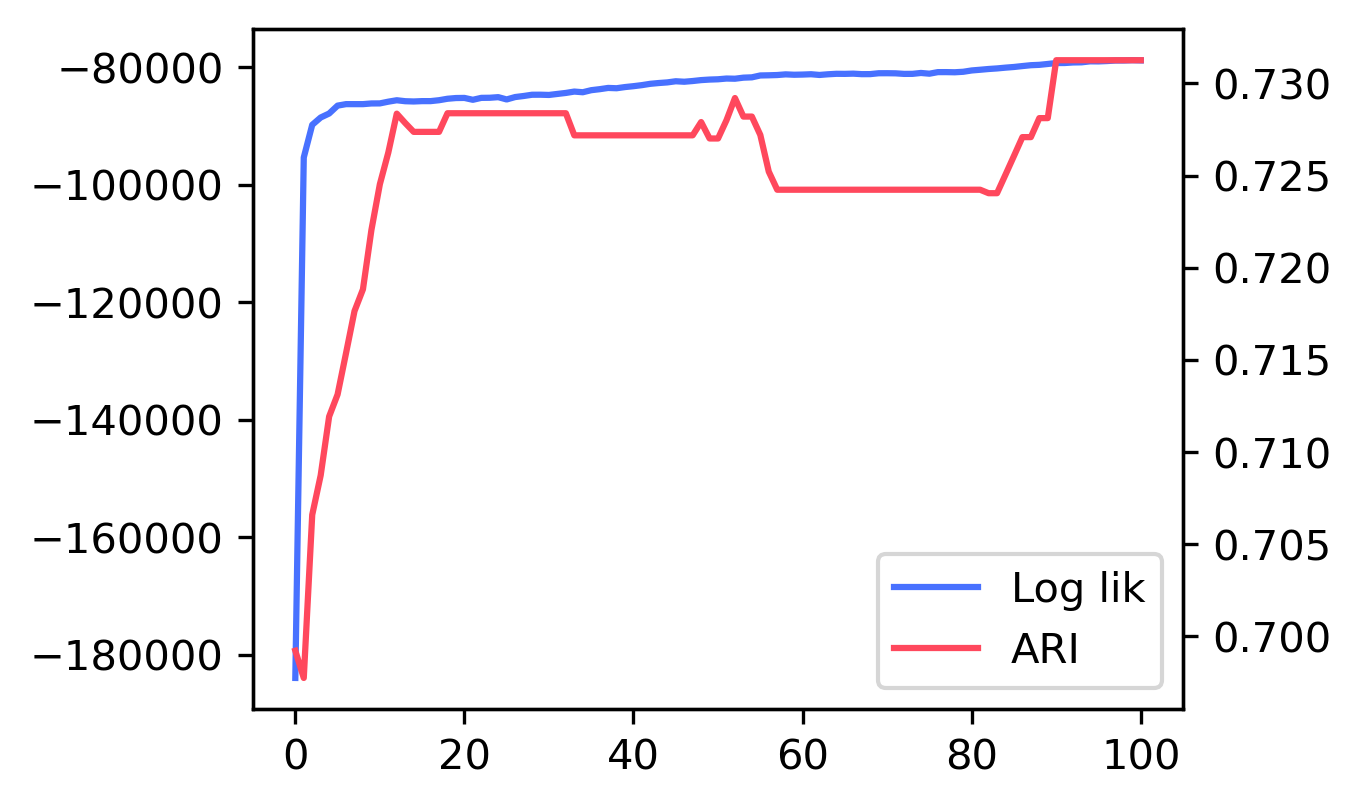

In [137]:
evaluator_5 = Evaluator(labels, 'silhouette', 'ARI', print_metrics=False)
gmn_5 = GMN([10, 3, 2, 2], [10, 6, 4, 2], init='kmeans',
          update_rate=1, num_iter=100, evaluator=evaluator_5,
          use_annealing=True, annealing_start_v=0.2,
          var_regularization=1e-4,
          stopping_criterion=stop_crit)
gmn_5.fit(data)

plot_metrics(evaluator_5)

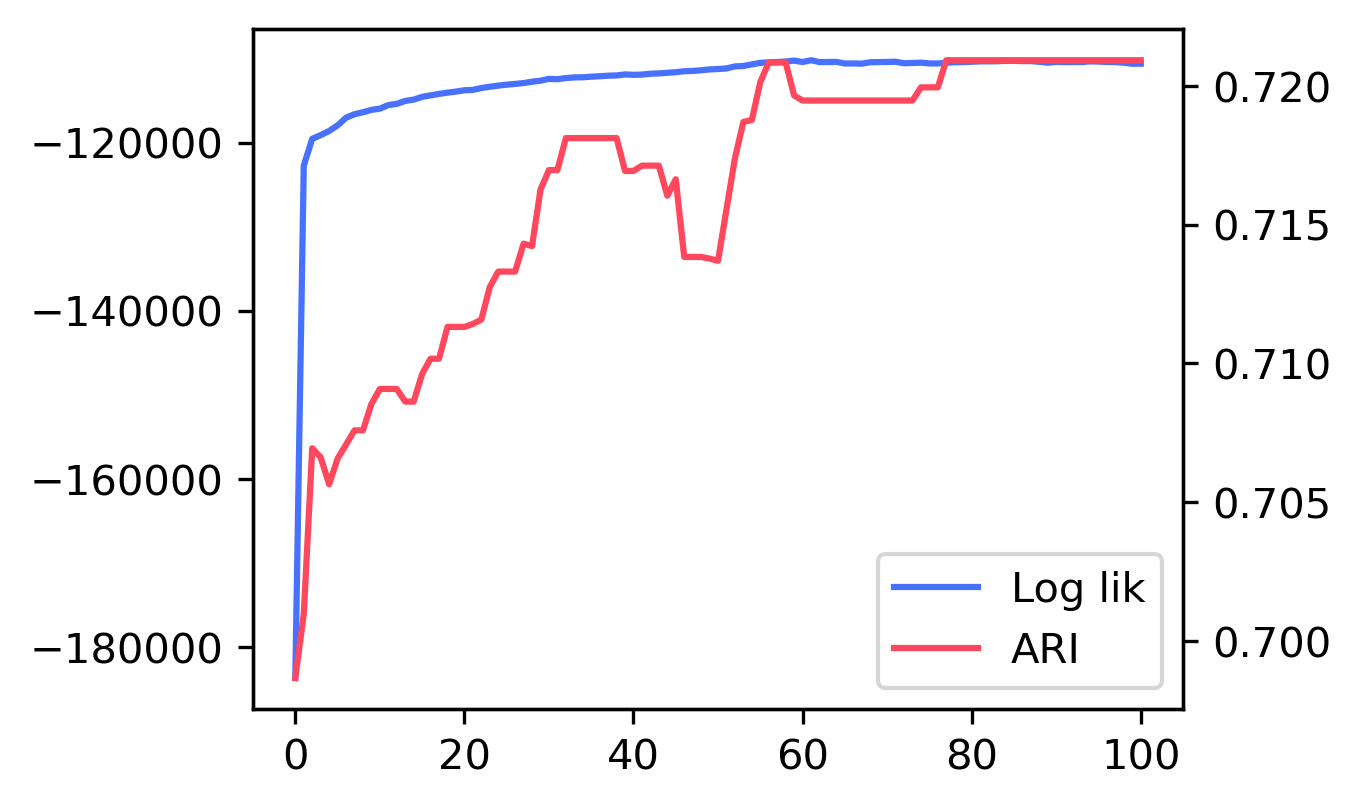

In [154]:
evaluator_6 = Evaluator(labels, 'silhouette', 'ARI', print_metrics=False)
gmn_6 = GMN([10, 3, 2, 2], [10, 6, 4, 2], init='kmeans',
          update_rate=1, num_iter=100, evaluator=evaluator_6,
          use_annealing=False,
          var_regularization=1e-3,
          stopping_criterion=stop_crit)
gmn_6.fit(data)

plot_metrics(evaluator_6)

## Plotting samples

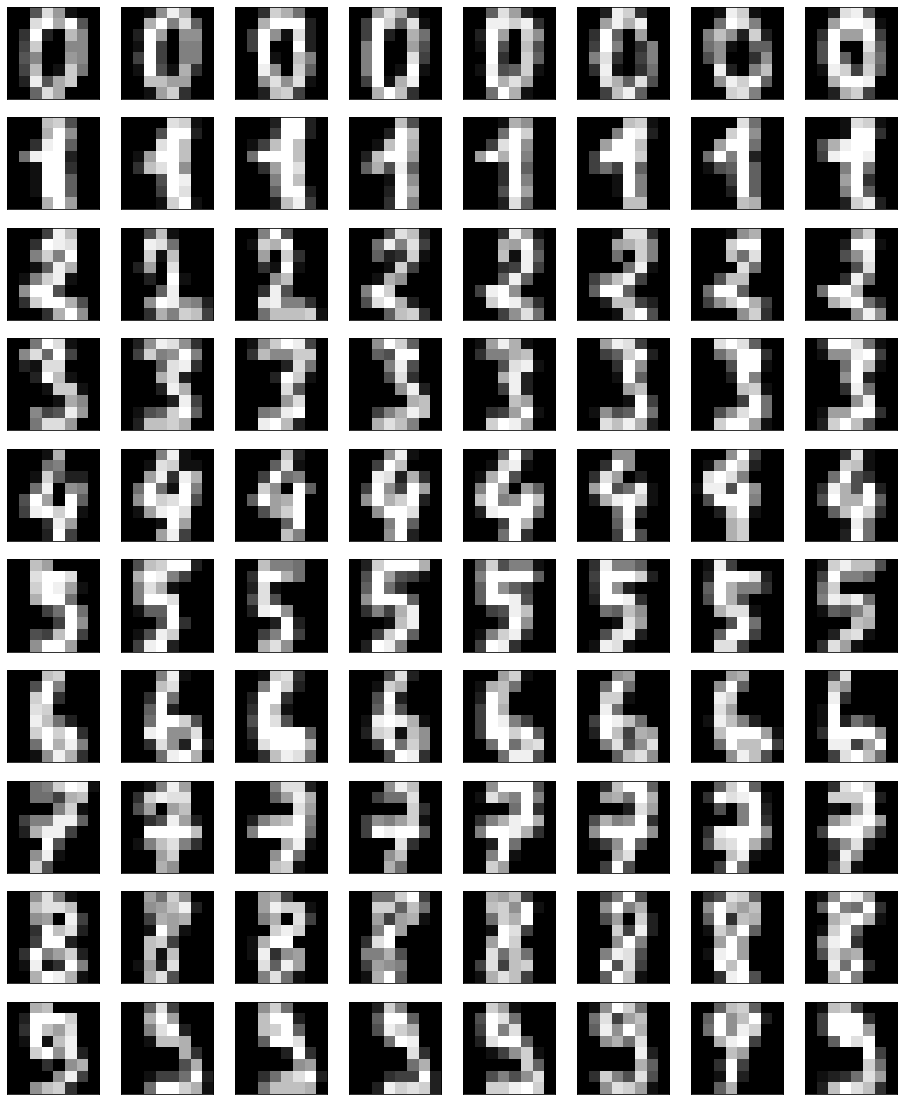

In [191]:
data_fig = show_cluster_images(data, labels, samples_n=8)

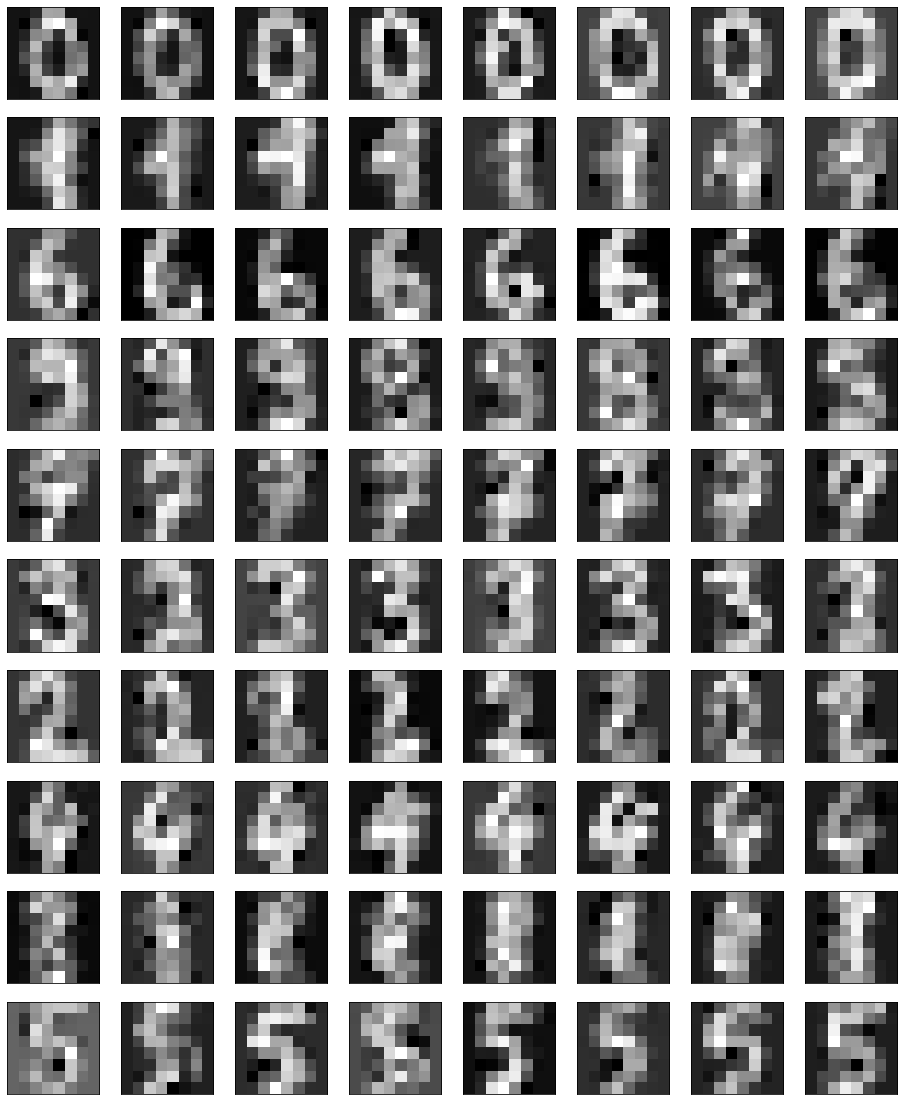

In [198]:
sample, clusters = gmn_6.random_sample(500, return_paths=False)
sample_fig = show_cluster_images(sample, clusters, samples_n=8)